# Machine Learning stack for Docker

Kickstart your Machine Learning experiments with Python 3.6.

**Libraries included:**
  * [Jupyter](http://jupyter.org/)
  * [Keras](https://keras.io/)
  * [MRJob](https://pythonhosted.org/mrjob/)
  * [Matplotlib](https://matplotlib.org/)
  * [NLTK](https://www.nltk.org/)
  * [Numpy](http://www.numpy.org/)
  * [OpenCV](https://opencv.org/)
  * [Pandas](https://pandas.pydata.org/)
  * [Requests](http://docs.python-requests.org/en/master/)
  * [Scikit-learn](http://scikit-learn.org/stable/)
  * [Scipy](https://www.scipy.org/)
  * [Seaborn](https://seaborn.pydata.org/)
  * [Spark](https://spark.apache.org/)
  * [Tensorflow](https://www.tensorflow.org/)

## Examples

### Spark
---

In [2]:
import findspark
findspark.init()

import pyspark
import random

sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

3.14110128


### NLTK

Taken from: https://likegeeks.com/nlp-tutorial-using-python-nltk/

---

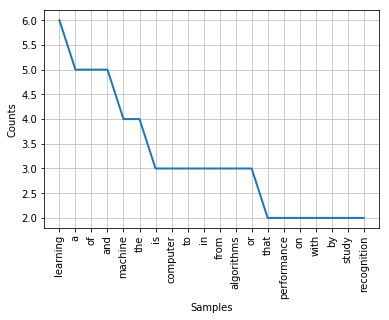

In [10]:
import nltk

sample = "Machine learning is a field of computer science that uses statistical techniques to give computer systems the ability to \"learn\" (e.g., progressively improve performance on a specific task) with data, without being explicitly programmed.[1]. The name machine learning was coined in 1959 by Arthur Samuel.[2] Evolved from the study of pattern recognition and computational learning theory in artificial intelligence,[3] machine learning explores the study and construction of algorithms that can learn from and make predictions on data[4] – such algorithms overcome following strictly static program instructions by making data-driven predictions or decisions,[5]:2 through building a model from sample inputs. Machine learning is employed in a range of computing tasks where designing and programming explicit algorithms with good performance is difficult or infeasible; example applications include email filtering, detection of network intruders or malicious insiders working towards a data breach,[6] optical character recognition (OCR),[7] learning to rank, and computer vision."
tokens = [t.lower() for t in sample.split()]
 
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

### OpenCV
---

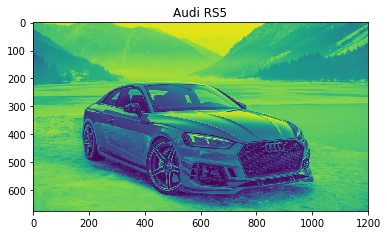

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('audi.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Audi RS5')
plt.show()

### Tensorflow

Taken from: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb

---

In [22]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [23]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [16]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [18]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [20]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [26]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.297553778 W= 0.51210093 b= -1.0869932
Epoch: 0100 cost= 0.272076190 W= 0.49648833 b= -0.97467726
Epoch: 0150 cost= 0.249540225 W= 0.48180437 b= -0.8690413
Epoch: 0200 cost= 0.229606450 W= 0.46799365 b= -0.769688
Epoch: 0250 cost= 0.211974770 W= 0.45500457 b= -0.67624545
Epoch: 0300 cost= 0.196378693 W= 0.44278762 b= -0.588358
Epoch: 0350 cost= 0.182583764 W= 0.43129757 b= -0.5056989
Epoch: 0400 cost= 0.170381948 W= 0.42049077 b= -0.427956
Epoch: 0450 cost= 0.159589246 W= 0.41032678 b= -0.3548368
Epoch: 0500 cost= 0.150042921 W= 0.40076724 b= -0.28606582
Epoch: 0550 cost= 0.141599268 W= 0.39177623 b= -0.22138563
Epoch: 0600 cost= 0.134130776 W= 0.38332003 b= -0.1605518
Epoch: 0650 cost= 0.127524987 W= 0.37536663 b= -0.103336096
Epoch: 0700 cost= 0.121682227 W= 0.3678863 b= -0.04952315
Epoch: 0750 cost= 0.116514392 W= 0.36085096 b= 0.0010892355
Epoch: 0800 cost= 0.111943588 W= 0.3542339 b= 0.04869157
Epoch: 0850 cost= 0.107900880 W= 0.34801048 b= 0.09346263
Epoch: 090

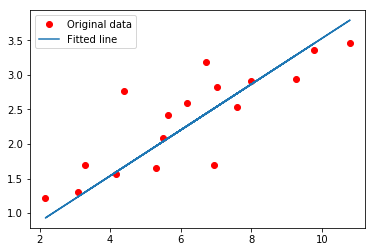

In [32]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()